In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
import ast

In [ ]:
df = pd.read_csv("evolutionary.csv")
df

,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage
0,0,1,0.0,"[-0.3580349199523043, -0.8058786630044816, 0.6...",0.566389,0.0
1,0,2,0.0,"[-0.6217555669299004, 0.9147857521456948, -0.7...",0.566389,0.0
2,0,3,0.0,"[-0.14063487677489528, 0.2004760471772875, -0....",0.566389,0.0
3,0,4,0.0,"[0.838928813413595, -0.03650801841252016, -0.5...",0.566389,0.0
4,0,5,0.0,"[0.3133390000975207, -0.4010252871788491, 0.19...",0.566389,0.0
...,...,...,...,...,...,...
9995,499,7985,0.0,"[0.33223658987334437, -0.6757744162151808, -0....",0.239841,0.0
9996,499,7986,0.0,"[0.1892116546958602, -0.6496607788946125, -0.5...",0.239841,0.0
9997,499,7987,0.0,"[0.10816010404273699, -0.6374814010409926, -0....",0.239841,0.0
9998,499,7988,0.0,"[0.16295279390093387, -0.6315959404190662, -0....",0.239841,0.0


In [3]:
def plot_graph(x_values, y_values, title):
    # Optional: set a nice style
    plt.style.use("tableau-colorblind10")  # or 'ggplot', 'bmh', 'fivethirtyeight', etc.

    # Create your figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))  # you can adjust the size

    # Plot something
    ax.plot(x_values, y_values, label='Label', color='blue', marker='o')

    # Add titles and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X Axis Label', fontsize=12)
    ax.set_ylabel('Y Axis Label', fontsize=12)

    # Grid, legend, etc.
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.tick_params(axis='both', labelsize=10)

    # Optional: annotate points
    # ax.annotate('Note', xy=(x, y), xytext=(x+1, y+1), arrowprops=dict(arrowstyle='->'))

    # Save or show
    plt.tight_layout()
    plt.show()  # Show the plot


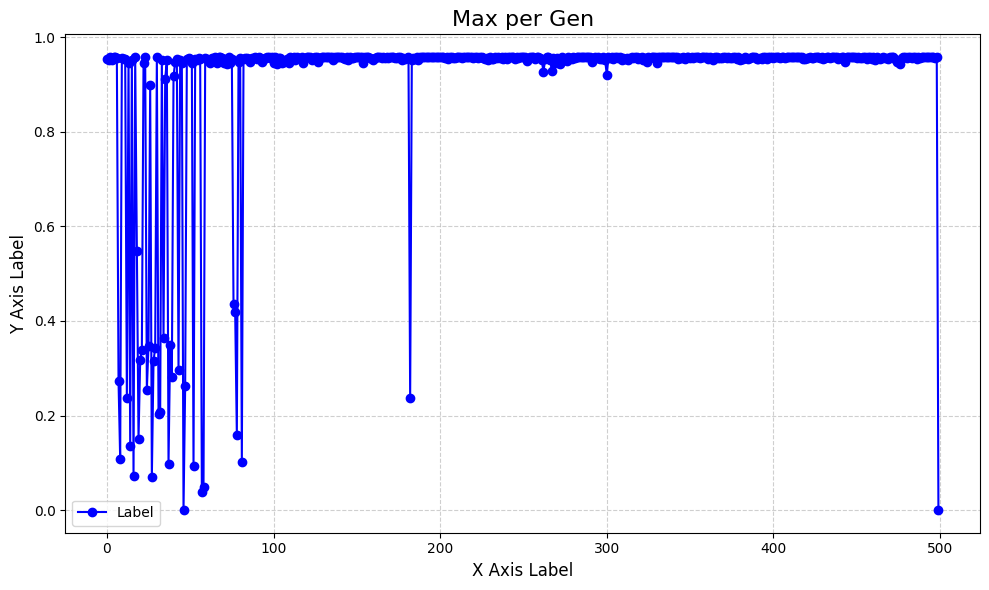

In [4]:
diversity_per_gen = df.groupby("Gen Number")["Fitness"].max().reset_index()

diversity_per_gen.to_csv("max_per_gen.csv", index=False)

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Fitness"]

plot_graph(x_values, y_values, "Max per Gen")

In [5]:
max_vale = df.loc[df["ID"] < 200]["Fitness"].max()
df.loc[df["ID"] != -1].loc[df["Fitness"] == max_vale]

,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage
83,4,67,0.958413,"[-0.18767839783299742, -0.392634197352036, -0....",0.498023,0.958413
107,5,88,0.958413,"[0.7225873531141305, -1, -1, 1, -1, -0.7695568...",0.510281,0.958413
604,30,485,0.958413,"[0.5340623271184045, -0.4103774580606934, -0.2...",0.395751,0.958413
1301,65,905,0.958413,"[0.23137841801411316, 0.26423944227102714, -0....",0.389908,0.958413
1342,67,1068,0.958413,"[-0.13922342732594534, -0.12743471834175635, -...",0.367666,0.958413
...,...,...,...,...,...,...
9872,493,7886,0.958413,"[0.0016659951419151532, -0.4897220997995676, 0...",0.263778,0.958413
9918,495,7924,0.958413,"[-0.01978016287085025, -0.45089537736231533, 0...",0.234064,0.958413
9929,496,7931,0.958413,"[-0.19749013747316146, -0.5713898601989725, 0....",0.263220,0.958413
9932,496,7934,0.958413,"[-0.04946849818883302, -0.42466866158329764, 0...",0.263220,0.958413


In [6]:
max_value = df.loc[df["Gen Number"] == 523]["Fitness"].max()
display(df.loc[(df["Fitness"] == max_value) & (df["Gen Number"] == 523)])



,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage


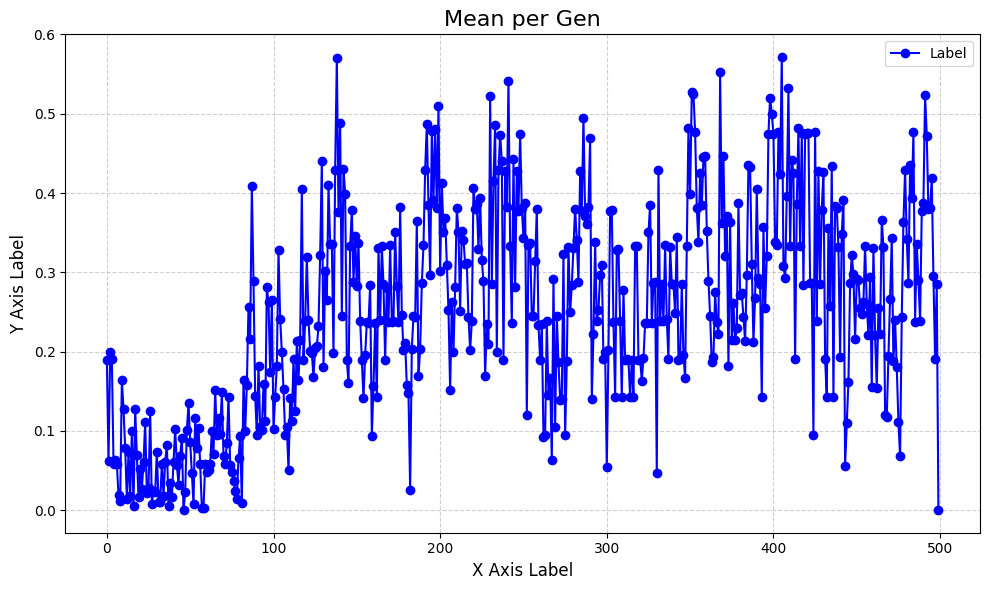

In [7]:
diversity_per_gen = df.groupby("Gen Number")["Fitness"].mean().reset_index()

diversity_per_gen.to_csv("mean_per_gen.csv", index=False)

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Fitness"]

plot_graph(x_values, y_values, "Mean per Gen")

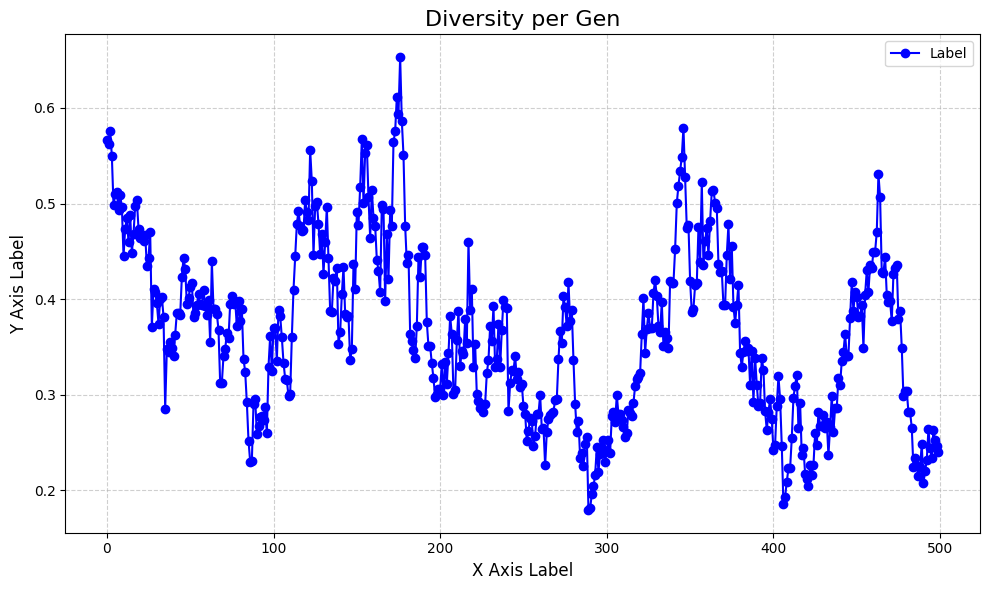

In [8]:
diversity_per_gen = df.groupby("Gen Number")["Diversity"].mean().reset_index()

diversity_per_gen.to_csv("diversity_per_gen.csv", index=False)

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Diversity"]

plot_graph(x_values, y_values, "Diversity per Gen")

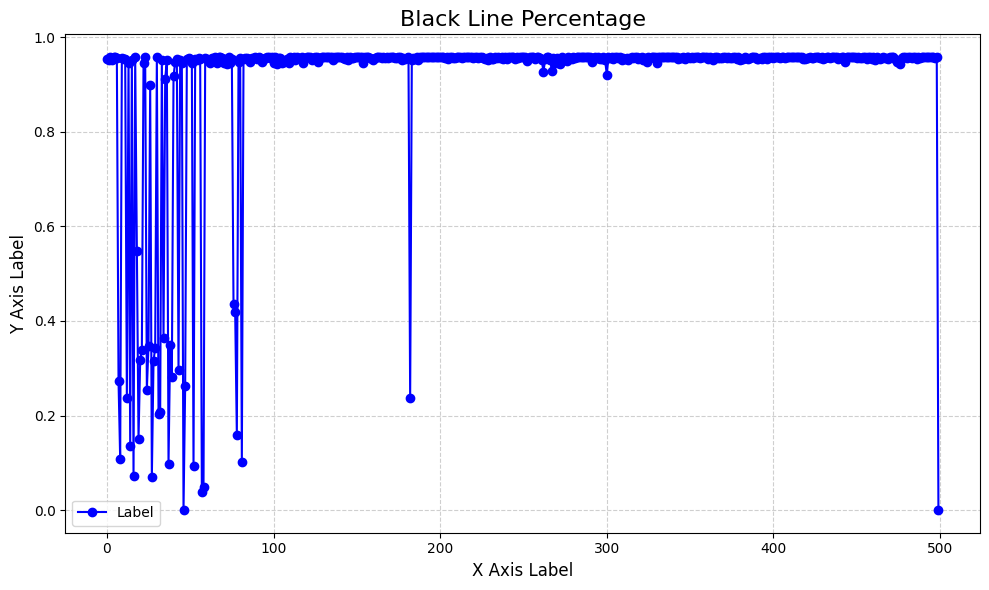

In [9]:
black_area_covered_per_gen = df.groupby("Gen Number")["Black Line Percentage"].max().reset_index()

black_area_covered_per_gen.to_csv("black_area_per_gen.csv", index=False)

x_values = black_area_covered_per_gen.index
y_values = black_area_covered_per_gen["Black Line Percentage"]

plot_graph(x_values, y_values, "Black Line Percentage")

In [10]:
max_value = black_area_covered_per_gen["Black Line Percentage"].max()
print(max_value)
df.loc[(df["Black Line Percentage"] == max_value)]
# gen = black_area_covered_per_gen.loc[black_area_covered_per_gen["Black Line Percentage"] == max_value, "Gen Number"].iloc[0]
# max_value = df.loc[df["Gen Number"] == gen, "Black Line Percentage"].max()
# df.loc[(df["Gen Number"] == gen) & (df["Black Line Percentage"] == max_value)]


0.9584133077415228


,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage
83,4,67,0.958413,"[-0.18767839783299742, -0.392634197352036, -0....",0.498023,0.958413
107,5,88,0.958413,"[0.7225873531141305, -1, -1, 1, -1, -0.7695568...",0.510281,0.958413
604,30,485,0.958413,"[0.5340623271184045, -0.4103774580606934, -0.2...",0.395751,0.958413
1301,65,905,0.958413,"[0.23137841801411316, 0.26423944227102714, -0....",0.389908,0.958413
1342,67,1068,0.958413,"[-0.13922342732594534, -0.12743471834175635, -...",0.367666,0.958413
...,...,...,...,...,...,...
9872,493,7886,0.958413,"[0.0016659951419151532, -0.4897220997995676, 0...",0.263778,0.958413
9918,495,7924,0.958413,"[-0.01978016287085025, -0.45089537736231533, 0...",0.234064,0.958413
9929,496,7931,0.958413,"[-0.19749013747316146, -0.5713898601989725, 0....",0.263220,0.958413
9932,496,7934,0.958413,"[-0.04946849818883302, -0.42466866158329764, 0...",0.263220,0.958413


In [11]:
import pandas as pd

# Load your 4 CSV files
df1 = pd.read_csv("black_area_per_gen.csv")
df2 = pd.read_csv("diversity_per_gen.csv")
df3 = pd.read_csv("max_per_gen.csv")
df4 = pd.read_csv("mean_per_gen.csv")

# Concatenate them column-wise
merged_df = pd.concat([df1, df2, df3, df4], axis=1)

# Save the merged DataFrame to a new CSV
merged_df.to_csv("merged_output.csv", index=False)
